출처 : https://wikidocs.net/35476

## **06-09 소프트맥스 회귀(Softmax Regression)**

앞서 로지스틱 회귀를 통해 2개의 선택지 중에서 1개를 고르는 이진 분류(Binary Classification)를 풀어봤습니다. 이번에는 3개 이상의 선택지 중에서 1개를 고르는 다중 클래스 분류 문제를 위한 소프트맥스 회귀(Softmax Regression)에 대해서 배웁니다.

---
### **1. 다중 클래스 분류(Multi-class Classification)**  

앞서 로지스틱 회귀에서 사용한 시그모이드 함수는 입력된 데이터에 대해서 0과 1사이의 값을 출력하여 해당 값이 둘 중 하나에 속할 확률로 해석할 수 있도록 만들어주었습니다. 예를 들어 0이 정상 메일, 1이 스팸 메일이라고 정의해놓는다면 시그모이드 함수의 0과 1사이의 출력값을 스팸 메일일 확률로 해석할 수 있었습니다. 확률값이 0.5를 넘으면 1에 가까우니 스팸 메일로 판단하면 되고, 그 반대라면 정상 메일로 판단하면 됩니다.

이진 분류가 두 개의 선택지 중 하나를 고르는 문제였다면, 세 개 이상의 선택지 중 하나를 고르는 문제를 다중 클래스 분류라고 합니다. 아래의 붓꽃 품종 예측 데이터는 꽃받침 길이, 꽃받침 넓이, 꽃잎 길이, 꽃잎 넓이로부터 setosa, versicolor, virginica라는 3개의 품종 중 어떤 품종인지를 예측하는 문제를 위한 데이터로 전형적인 다중 클래스 분류 문제를 위한 데이터입니다.

|SepalLengthCm($x_1$)	|SepalWidthCm($x_2$)	|PetalLengthCm($x_3$)	|PetalWidthCm($x_4$)	|Species($y$)|
|---|---|---|---|---|
|5.1	|3.5	|1.4	|0.2	|setosa|
|4.9	|3.0	|1.4	|0.2	|setosa|
|5.8	|2.6	|4.0	|1.2	|versicolor|
|6.7	|3.0	|5.2	|2.3	|virginica|
|5.6	|2.8	|4.9	|2.0	|virginica|

여기에 앞서 배운 시그모이드 함수를 사용해본다면 어떨까요? 어쩌면 입력된 샘플 데이터에 대해서 각 정답지에 대해서 시그모이드 함수를 적용해볼 수 있습니다. 만약 그렇게 한다면, setosa가 정답일 확률은 0.8, versicolor가 정답일 확률은 0.2, virginica가 정답일 확률은 0.4 등과 같은 출력을 얻게됩니다. 그런데 이 전체 확률의 합계가 1이 되도록 하여 전체 선택지에 걸친 확률로 바꿀 순 없을까요? 예를 들어 샘플 데이터가 입력으로 들어오면 모델이 setosa일 확률이 0.7, versicolor일 확률 0.05, virginica일 확률이 0.25과 같이 세 개의 확률의 총 합이 1인 예측값을 얻도록 하자는 것입니다. 그리고 이 경우 확률값이 가장 높은 setosa로 예측한 것으로 간주하고자 합니다. 이럴 때 사용할 수 있는 것이 **소프트맥스 함수** 입니다.

---
### **2. 소프트맥스 함수(Softmax function)**

소프트맥스 함수는 선택해야 하는 선택지의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정합니다. 우선 수식에 대해 설명하고, 그 후에는 그림으로 이해해보겠습니다.

#### **1) 소프트맥스 함수의 이해**
k차원의 벡터에서 i번째 원소를 $z_{i}$, i번째 클래스가 정답일 확률을 $p_{i}$로 나타낸다고 하였을 때 소프트맥스 함수는 $p_{i}$를 다음과 같이 정의합니다.

$$p_{i}=\frac{e^{z_{i}}}{\sum_{j=1}^{k} e^{z_{j}}}\ \ for\ i=1, 2, ... k$$

위에서 풀어야하는 문제에 소프트맥스 함수를 차근차근 적용해봅시다. 위에서 풀어야하는 문제의 경우 k=3이므로 3차원 벡터 $z=[z_{1}\ z_{2}\ z_{3}]$의 입력을 받으면 소프트맥스 함수는 아래와 같은 출력을 리턴합니다.  

$$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = \hat{y} = \text{예측값}$$

 $p_{1}, p_{2}, p_{3}$ 각각은 1번 클래스가 정답일 확률, 2번 클래스가 정답일 확률, 3번 클래스가 정답일 확률을 나타내며 각각 0과 1사이의 값으로 총 합은 1이 됩니다. 여기서 분류하고자하는 3개의 클래스는 virginica, setosa, versicolor이므로 이는 결국 주어진 입력이 virginica일 확률, setosa일 확률, versicolor일 확률을 나타내는 값을 의미합니다. 여기서는 i가 1일 때는 virginica일 확률을 나타내고, 2일 때는 setosa일 확률, 3일때는 versicolor일 확률이라고 지정하였다고 합시다. 이 지정 순서는 문제를 풀고자 하는 사람의 무작위 선택입니다. 이에따라 식을 문제에 맞게 다시 쓰면 아래와 같습니다.

$$softmax(z)=[\frac{e^{z_{1}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{2}}}{\sum_{j=1}^{3} e^{z_{j}}}\ \frac{e^{z_{3}}}{\sum_{j=1}^{3} e^{z_{j}}}] = [p_{1}, p_{2}, p_{3}] = [p_{virginica}, p_{setosa}, p_{versicolor}]$$

다소 복잡해보이지만 어려운 개념이 아닙니다. 분류하고자 하는 클래스가 k개일 때, k차원의 벡터를 입력받아서 모든 벡터 원소의 값을 0과 1사이의 값으로 값을 변경하여 다시 k차원의 벡터를 반환한다는 내용을 식으로 기재했습니다. 방금 배운 개념을 그림을 통해 다시 설명해보겠습니다.

#### **2) 그림을 통한 이해**

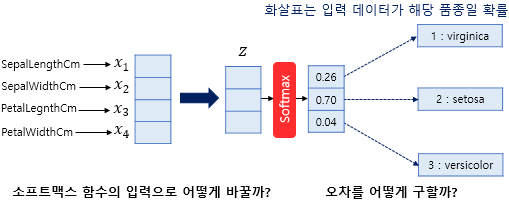

위의 그림에 점차 살을 붙여가는 식으로 설명합니다. 여기서는 샘플 데이터를 1개씩 입력으로 받아 처리한다고 가정해봅시다. 즉, 배치 크기가 1입니다.


위의 그림에는 두 가지 의문이 있습니다. 첫번째 질문은 소프트맥스 함수의 입력에 대한 의문입니다. 하나의 샘플 데이터는 4개의 독립 변수 $x$를 가지는데 이는 모델이 4차원 벡터를 입력으로 받음을 의미합니다. 그런데 소프트맥스의 함수의 입력으로 사용되는 벡터는 벡터의 차원이 분류하고자 하는 클래스의 개수가 되어야 하므로 어떤 가중치 연산을 통해 3차원 벡터로 변환되어야 합니다. 위의 그림에서는 소프트맥스 함수의 입력으로 사용되는 3차원 벡터를 $z$로 표현하였습니다.  

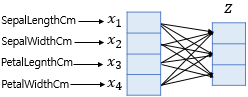

샘플 데이터 벡터를 소프트맥스 함수의 입력 벡터로 차원을 축소하는 방법은 간단합니다. 소프트맥스 함수의 입력 벡터 $z$의 차원수만큼 결과값이 나오도록 가중치 곱을 진행합니다. 위의 그림에서 화살표는 총 (4 × 3 = 12) 12개이며 전부 다른 가중치를 가지고, 학습 과정에서 점차적으로 오차를 최소화하는 가중치로 값이 변경됩니다.

두번째 질문은 오차 계산 방법에 대한 의문입니다. 소프트맥스 함수의 출력은 분류하고자하는 클래스의 개수만큼 차원을 가지는 벡터로 각 원소는 0과 1사이의 값을 가집니다. 이 각각은 특정 클래스가 정답일 확률을 나타냅니다. 여기서는 첫번째 원소인 $p_1$은 virginica가 정답일 확률, 두번째 원소인 $p_2$는 setosa가 정답일 확률, 세번째 원소인 $p_3$은 versicolor가 정답일 확률로 고려하고자 합니다. 그렇다면 이 예측값과 비교를 할 수 있는 실제값의 표현 방법이 있어야 합니다. 소프트맥스 회귀에서는 실제값을 원-핫 벡터로 표현합니다.  

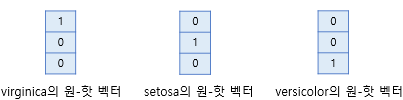

위의 그림은 소프트맥스 함수의 출력 벡터의 첫번째 원소 $p_1$가 virginica가 정답일 확률, 두번째 원소 $p_2$가 setosa가 정답일 확률, 세번째 원소 $p_3$가 versicolor가 정답일 확률을 의미한다고 하였을 때, 각 실제값의 정수 인코딩은 1, 2, 3이 되고 이에 원-핫 인코딩을 수행하여 실제값을 원-핫 벡터로 수치화한 것을 보여줍니다.

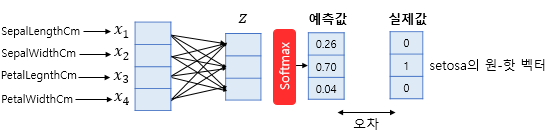

예를 들어 현재 풀고 있는 샘플 데이터의 실제값이 setosa라면 setosa의 원-핫 벡터는 [0 1 0]입니다. 이 경우, 예측값과 실제값의 오차가 0이 되는 경우는 소프트맥스 함수의 결과가 [0 1 0]이 되는 경우입니다. 이 두 벡터의 오차를 계산하기 위해서 소프트맥스 회귀는 비용 함수로 크로스 엔트로피 함수를 사용하는데, 이는 뒤에서 비용 함수를 설명하는 부분에서 다시 언급하겠습니다.

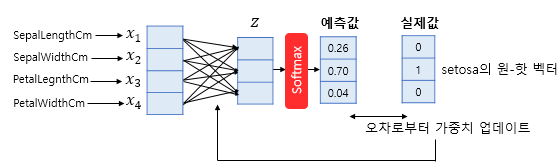

앞서 배운 선형 회귀나 로지스틱 회귀와 마찬가지로 오차로부터 가중치를 업데이트 합니다.

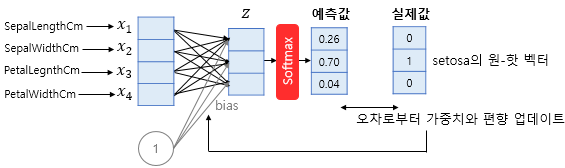


더 정확히는 선형 회귀나 로지스틱 회귀와 마찬가지로 편향 또한 업데이트의 대상이 되는 매개 변수입니다. 소프트맥스 회귀를 벡터와 행렬 연산으로 이해해봅시다. 입력을 특성(feature)의 수만큼의 차원을 가진 입력 벡터 $x$라고 하고, 가중치 행렬을 $W$, 편향을 $b$라고 하였을 때, 소프트맥스 회귀에서 예측값을 구하는 과정을 벡터와 행렬 연산으로 표현하면 아래와 같습니다.

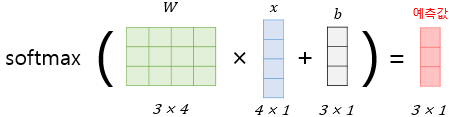

여기서 4는 특성의 수이며 3은 클래스의 개수에 해당됩니다.

---
### **3. 원-핫 벡터의 무작위성**

꼭 실제값을 원-핫 벡터로 표현해야만 다중 클래스 분류 문제를 풀 수 있는 것은 아니지만, 대부분의 다중 클래스 분류 문제가 각 클래스 간의 관계가 균등하다는 점에서 원-핫 벡터는 이러한 점을 표현할 수 있는 적절한 표현 방법입니다.

다수의 클래스를 분류하는 문제에서는 이진 분류처럼 2개의 숫자 레이블이 아니라 클래스의 개수만큼 숫자 레이블이 필요합니다. 이때 직관적으로 생각해볼 수 있는 레이블링 방법은 분류해야 할 클래스 전체에 정수 인코딩을 하는 겁니다. 예를 들어서 분류해야 할 레이블이 {red, green, blue}와 같이 3개라면 각각 0, 1, 2로 레이블을 합니다. 또는 분류해야 할 클래스가 4개고 인덱스를 숫자 1부터 시작하고 싶다고 하면 {baby, child, adolescent, adult}라면 1, 2, 3, 4로 레이블을 해볼 수 있습니다. 그런데 일반적인 다중 클래스 분류 문제에서 레이블링 방법으로는 위와 같은 정수 인코딩이 아니라 원-핫 인코딩을 사용하는 것이 보다 클래스의 성질을 잘 표현하였다고 할 수 있습니다. 그 이유를 알아봅시다.

Banana, Tomato, Apple라는 3개의 클래스가 존재하는 문제가 있다고 해봅시다. 레이블은 정수 인코딩을 사용하여 각각 1, 2, 3을 부여하였습니다. 손실 함수로 선형 회귀 실습에서 배운 평균 제곱 오차 MSE를 사용하면 정수 인코딩이 어떤 오해를 불러일으킬 수 있는지 확인할 수 있습니다. 아래의 식은 앞서 선형 회귀에서 배웠던 MSE를 다시 그대로 가져온 것입니다. $\hat{y}$는 예측값을 의미합니다.

$$Loss\ function = \frac{1}{n} \sum_i^{n} \left(y_{i} - \hat{y_{i}}\right)^2$$

직관적인 오차 크기 비교를 위해 평균을 구하는 수식은 제외하고 제곱 오차로만 판단해봅시다.


실제값이 Tomato일때 예측값이 Banana이었다면 제곱 오차는 다음과 같습니다.  
$(2-1)^{2} = 1$

실제값이 Apple일때 예측값이 Banana이었다면 제곱 오차는 다음과 같습니다.  
$(3-1)^{2} = 4$

즉, Banana과 Tomato 사이의 오차보다 Banana과 Apple의 오차가 더 큽니다. 이는 기계에게 Banana가 Apple보다는 Tomato에 더 가깝다는 정보를 주는 것과 다름없습니다. 더 많은 클래스에 대해서 정수 인코딩을 수행했다고 해봅시다.  

```python
    {Banana :1, Tomato :2, Apple :3, Strawberry :4, ... Watermelon :10}  

```

이 정수 인코딩은 Banana가 Watermelon보다는 Tomato에 더 가깝다는 의미를 담고 있습니다. 이는 사용자가 부여하고자 했던 정보가 아닙니다. 이러한 정수 인코딩의 순서 정보가 도움이 되는 분류 문제도 물론 있습니다. 바로 각 클래스가 순서의 의미를 갖고 있어서 회귀를 통해서 분류 문제를 풀 수 있는 경우입니다. 예를 들어 {baby, child, adolescent, adult}나 {1층, 2층, 3층, 4층}이나 {10대, 20대, 30대, 40대}와 같은 경우가 이에 해당됩니다. 하지만 일반적인 분류 문제에서는 각 클래스는 순서의 의미를 갖고 있지 않으므로 각 클래스 간의 오차는 균등한 것이 옳습니다. 정수 인코딩과 달리 원-핫 인코딩은 분류 문제 모든 클래스 간의 관계를 균등하게 분배합니다.

아래는 세 개의 카테고리에 대해서 원-핫 인코딩을 통해서 레이블을 인코딩했을 때 각 클래스 간의 제곱 오차가 균등함을 보여줍니다.  
  
$((1,0,0)-(0,1,0))^{2} = (1-0)^{2} + (0-1)^{2} + (0-0)^{2} = 2$

$((1,0,0)-(0,0,1))^{2} = (1-0)^{2} + (0-0)^{2} + (0-1)^{2} = 2$

다르게 표현하면 모든 클래스에 대해서 원-핫 인코딩을 통해 얻은 원-핫 벡터들은 모든 쌍에 대해서 유클리드 거리를 구해도 전부 유클리드 거리가 동일합니다. 원-핫 벡터는 이처럼 각 클래스의 표현 방법이 무작위성을 가진다는 점을 표현할 수 있습니다. 뒤에서 다시 언급되겠지만 이러한 원-핫 벡터의 관계의 무작위성은 때로는 단어의 유사성을 구할 수 없다는 단점으로 언급되기도 합니다.

---
### **4. 비용 함수(Cost function)**

소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용합니다. 여기서는 소프트맥스 회귀에서의 크로스 엔트로피 함수뿐만 아니라, 다양한 표기 방법에 대해서 이해해보겠습니다.

#### **1) 크로스 엔트로피 함수**
아래에서 $y$는 실제값을 나타내며, $k$는 클래스의 개수로 정의합니다. $y_j$는 실제값 원-핫 벡터의 $j$번째 인덱스를 의미하며, $p_j$는 샘플 데이터가 $j$번째 클래스일 확률을 나타냅니다. 표기에 따라서 $\hat{y}_{j}$
로 표현하기도 합니다.

$$cost = -\sum_{j=1}^{k}y_{j}\ log(p_{j})$$

이 함수가 왜 비용 함수로 적합한지 알아보겠습니다. $c$가 실제값 원-핫 벡터에서 1을 가진 원소의 인덱스라고 한다면, $p_{c}=1$은 $\hat{y}$가 $y$를 정확하게 예측한 경우가 됩니다. 이를 식에 대입해보면 
이 되기 때문에, 결과적으로 $\hat{y}$가 $y$를 정확하게 예측한 경우의 크로스 엔트로피 함수의 값은 0이 됩니다. 즉, $-\sum_{j=1}^{k}y_{j}\ log(p_{j})$ 이 값을 최소화하는 방향으로 학습해야 합니다.

이를 $n$개의 전체 데이터에 대한 평균을 구한다고 하면 최종 비용 함수는 다음과 같습니다.

$$cost = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)})$$


#### **2) 이진 분류에서의 크로스 엔트로피 함수**

로지스틱 회귀에서 배운 크로스 엔트로피 함수식과 달라보이지만, 본질적으로는 동일한 함수식입니다. 로지스틱 회귀의 크로스 엔트로피 함수식으로부터 소프트맥스 회귀의 크로스 엔트로피 함수식을 도출해봅시다.

$$cost = -(y\ logH(X) + (1-y)\ log(1-H(X)))$$


위의 식은 앞서 로지스틱 회귀에서 배웠던 크로스 엔트로피의 함수식을 보여줍니다. 위의 식에서 $y$를 $y_{1}$, $1-y$를 $y_{2}$로 치환하고 $H(X)$를 $p_1$, $1 - H(X)$를 $p_2$로 치환해봅시다. 결과적으로 아래의 식을 얻을 수 있습니다.

$$-(y_{1}\ log(p_{1})+y_{2}\ log(p_{2}))$$

이 식은 아래와 같이 표현할 수 있습니다.

$$-(\sum_{i=1}^{2}y_{i}\ log\ p_{i})$$

소프트맥스 회귀에서는 k의 값이 고정된 값이 아니므로 2를 k로 변경합니다.

$$-(\sum_{i=1}^{k}y_{i}\ log\ p_{i})$$


위의 식은 결과적으로 소프트맥스 회귀의 식과 동일합니다. 역으로 소프트맥스 회귀에서 로지스틱 회귀의 크로스 엔트로피 함수식을 얻는 것은 k를 2로 하고, $y_1$과 $y_2$를 각각 $y$와 $1-y$로 치환하고, $p_1$와 
$p_2$를 각각 $H(X)$와 $1-H(X)$로 치환하면 됩니다.

정리하면 소프트맥스 함수의 최종 비용 함수에서 $k$가 2라고 가정하면 결국 로지스틱 회귀의 비용 함수와 같습니다. 

$$cost = -\frac{1}{n} \sum_{i=1}^{n} \sum_{j=1}^{k}y_{j}^{(i)}\ log(p_{j}^{(i)}) = -\frac{1}{n} \sum_{i=1}^{n} [y^{(i)}log(p^{(i)}) + (1-y^{(i)})log(1-p^{(i)})]$$

---
### **5. 인공 신경망 다이어그램**
n개의 특성을 가지고 m개의 클래스를 분류하는 소프트맥스 회귀를 뒤에서 배우게 되는 인공 신경망의 형태로 표현하면 다음과 같습니다. 소프트맥스 회귀 또한 하나의 인공 신경망으로 볼 수 있습니다.

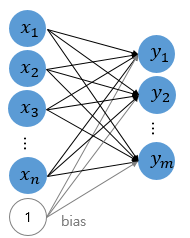

사실 위의 그림은 앞서 소프트맥스 함수를 사용하기 위해 설명했던 아래의 그림에서 특성의 개수를 $n$으로 하고, 클래스의 개수를 $m$으로 일반화한 뒤에 그림을 좀 더 요약해서 표현한 것으로 봐도 무방합니다.  

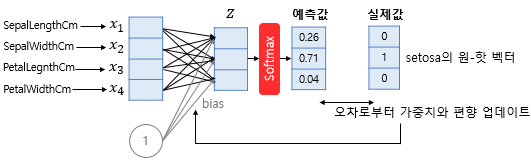

마지막 편집일시 : 2022년 11월 14일 2:49 오후